In [264]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import utils
from sklearn import model_selection
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
#from matplotlib.pylab import rcParams   
#import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [265]:
df_CO2_Emission = pd.read_csv('CO2 Emissions_Canada.csv')
df_CO2_Emission

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


DATA Prepation

In [266]:
df_CO2_Emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [267]:
df_CO2_Emission.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [268]:
df_CO2_Emission.drop_duplicates(inplace=True)

In [269]:
df_CO2_Emission.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [270]:
df_CO2_Emission_wait = pd.DataFrame()
df_CO2_Emission_check = pd.DataFrame()
columns_cont = []
for i in df_CO2_Emission.columns:
    temp = i
    if df_CO2_Emission[i].dtypes == 'object' or i == 'CO2 Emissions(g/km)':
        df_CO2_Emission_wait[temp] = df_CO2_Emission[i]
    else:
        columns_cont.append(i)
        df_CO2_Emission_check[temp] = df_CO2_Emission[i]


In [271]:
df_CO2_Emission_check

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27
...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30
7381,2.0,4,11.2,8.3,9.9,29
7382,2.0,4,11.7,8.6,10.3,27
7383,2.0,4,11.2,8.3,9.9,29


In [272]:
df_CO2_Emission_wait

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,AS5,Z,196
1,ACURA,ILX,COMPACT,M6,Z,221
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,136
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244
...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232


In [273]:
df_CO2_Emission_wait.reset_index(inplace=True)
df_CO2_Emission_wait.drop(columns='index',inplace=True)
df_CO2_Emission_wait

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,AS5,Z,196
1,ACURA,ILX,COMPACT,M6,Z,221
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,136
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244
...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232


In [274]:
x_data_test = {'Engine Size(L)': [3.6], 'Cylinders': [6],'Fuel Consumption Comb (L/100 km)': [12.3]
,'Fuel Consumption Comb (mpg)': [23]}

In [275]:
df_x_test = pd.DataFrame(data=x_data_test)
df_x_test

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,3.6,6,12.3,23


In [276]:
df_CO2_Emission_check = df_CO2_Emission_check.append(df_x_test)

In [277]:
df_CO2_Emission_check

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27
...,...,...,...,...,...,...
7381,2.0,4,11.2,8.3,9.9,29
7382,2.0,4,11.7,8.6,10.3,27
7383,2.0,4,11.2,8.3,9.9,29
7384,2.0,4,12.2,8.7,10.7,26


In [278]:
scale = preprocessing.StandardScaler()
df_CO2_Emission_check = pd.DataFrame(scale.fit_transform(df_CO2_Emission_check),columns = columns_cont)

In [279]:
df_CO2_Emission_check

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851198,-0.877034,-0.762844,-1.040321,-0.854615,0.771590
1,-0.558157,-0.877034,-0.396934,-0.601475,-0.481284,0.219437
2,-1.217500,-0.877034,-1.860575,-1.435283,-1.737032,2.842161
3,0.247707,0.206412,0.025270,0.012910,0.027803,-0.332715
4,0.247707,0.206412,-0.143611,-0.162629,-0.141893,-0.056639
...,...,...,...,...,...,...
6278,-0.851198,-0.877034,-0.396934,-0.338167,-0.379467,0.219437
6279,-0.851198,-0.877034,-0.256199,-0.206513,-0.243710,-0.056639
6280,-0.851198,-0.877034,-0.396934,-0.338167,-0.379467,0.219437
6281,-0.851198,-0.877034,-0.115464,-0.162629,-0.107954,-0.194677


In [280]:
df_use_predict = df_CO2_Emission_check.tail(1)
df_CO2_Emission_check.drop(df_CO2_Emission_check.tail(1).index,inplace=True)

In [281]:
df_use_predict.pop("Fuel Consumption City (L/100 km)")
df_use_predict.pop("Fuel Consumption Hwy (L/100 km)")

6282   NaN
Name: Fuel Consumption Hwy (L/100 km), dtype: float64

##predictเข้า


In [282]:
Fuel = "Fuel Type_E"

In [283]:
df_use_predict["Fuel Type_D"] = 0
df_use_predict["Fuel Type_E"] = 0
df_use_predict["Fuel Type_N"] = 0
df_use_predict["Fuel Type_X"] = 0
df_use_predict["Fuel Type_Z"] = 0
df_use_predict

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
6282,0.320967,0.206412,0.435072,-0.608791,0,0,0,0,0


In [284]:
for i in df_use_predict:
    if i == Fuel:
        df_use_predict[i] = 1
df_use_predict

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
6282,0.320967,0.206412,0.435072,-0.608791,1,0,0,0,0


In [ ]:
df_CO2_Emission_check

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851198,-0.877034,-0.762844,-1.040321,-0.854615,0.771590
1,-0.558157,-0.877034,-0.396934,-0.601475,-0.481284,0.219437
2,-1.217500,-0.877034,-1.860575,-1.435283,-1.737032,2.842161
3,0.247707,0.206412,0.025270,0.012910,0.027803,-0.332715
4,0.247707,0.206412,-0.143611,-0.162629,-0.141893,-0.056639
...,...,...,...,...,...,...
6277,-0.851198,-0.877034,-0.537668,-0.601475,-0.549163,0.357475
6278,-0.851198,-0.877034,-0.396934,-0.338167,-0.379467,0.219437
6279,-0.851198,-0.877034,-0.256199,-0.206513,-0.243710,-0.056639
6280,-0.851198,-0.877034,-0.396934,-0.338167,-0.379467,0.219437


In [ ]:
df_CO2_Emission_wait

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,AS5,Z,196
1,ACURA,ILX,COMPACT,M6,Z,221
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,136
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244
...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232


{'whiskers': [<matplotlib.lines.Line2D at 0x20545f742b0>,
 'caps': [<matplotlib.lines.Line2D at 0x20545f76bc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20545f74dc0>,
 'medians': [<matplotlib.lines.Line2D at 0x20545f76980>,
 'fliers': [<matplotlib.lines.Line2D at 0x20545f758a0>,
 'means': []}

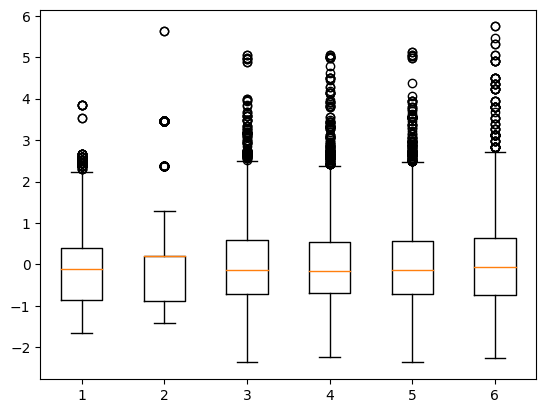

In [ ]:
fig,ax = plt.subplots()
ax.boxplot(df_CO2_Emission_check)

In [ ]:
def remove_outlier(df_in,col_name_x):
    q1_x = df_in[col_name_x].quantile(0.25)
    q3_x = df_in[col_name_x].quantile(0.75)
    iqr_x = q3_x-q1_x #Interquartile range
    fence_low_x  = q1_x-1.5*iqr_x
    fence_high_x = q3_x+1.5*iqr_x
    df_out = df_in.loc[((df_in[col_name_x] > fence_low_x) & (df_in[col_name_x] < fence_high_x))]
    return df_out


In [ ]:
for i in df_CO2_Emission_check.columns:
    df_CO2_Emission_check = remove_outlier(df_CO2_Emission_check,i)

{'whiskers': [<matplotlib.lines.Line2D at 0x20545e63940>,
 'caps': [<matplotlib.lines.Line2D at 0x205461dd240>,
 'boxes': [<matplotlib.lines.Line2D at 0x20545e61090>,
 'medians': [<matplotlib.lines.Line2D at 0x205461de6e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x205461de170>,
 'means': []}

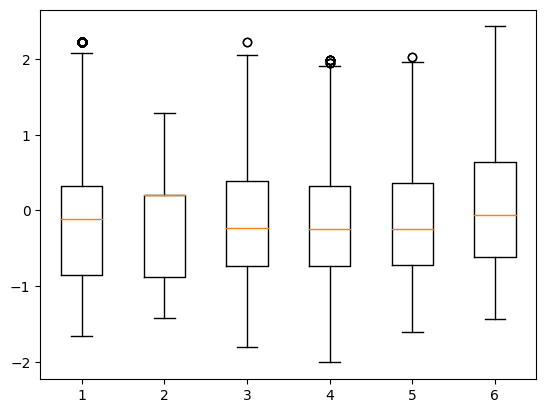

In [ ]:
fig,ax = plt.subplots()
ax.boxplot(df_CO2_Emission_check)

In [ ]:
df_CO2_Emission_check

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851198,-0.877034,-0.762844,-1.040321,-0.854615,0.771590
1,-0.558157,-0.877034,-0.396934,-0.601475,-0.481284,0.219437
3,0.247707,0.206412,0.025270,0.012910,0.027803,-0.332715
4,0.247707,0.206412,-0.143611,-0.162629,-0.141893,-0.056639
5,0.247707,0.206412,-0.199905,-0.601475,-0.345528,0.081399
...,...,...,...,...,...,...
6277,-0.851198,-0.877034,-0.537668,-0.601475,-0.549163,0.357475
6278,-0.851198,-0.877034,-0.396934,-0.338167,-0.379467,0.219437
6279,-0.851198,-0.877034,-0.256199,-0.206513,-0.243710,-0.056639
6280,-0.851198,-0.877034,-0.396934,-0.338167,-0.379467,0.219437


In [ ]:
df_CO2_Emission_ver_2 = pd.concat([df_CO2_Emission_wait,df_CO2_Emission_check], axis=1)

In [ ]:
df_CO2_Emission_ver_2.dropna(inplace=True)

In [ ]:
df_CO2_Emission_ver_2.reset_index(inplace=True)
df_CO2_Emission_ver_2.drop(columns='index',inplace=True)

In [ ]:
df_CO2_Emission_ver_2

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km),Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,ILX,COMPACT,AS5,Z,196,-0.851198,-0.877034,-0.762844,-1.040321,-0.854615,0.771590
1,ACURA,ILX,COMPACT,M6,Z,221,-0.558157,-0.877034,-0.396934,-0.601475,-0.481284,0.219437
2,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255,0.247707,0.206412,0.025270,0.012910,0.027803,-0.332715
3,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244,0.247707,0.206412,-0.143611,-0.162629,-0.141893,-0.056639
4,ACURA,RLX,MID-SIZE,AS6,Z,230,0.247707,0.206412,-0.199905,-0.601475,-0.345528,0.081399
...,...,...,...,...,...,...,...,...,...,...,...,...
5668,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219,-0.851198,-0.877034,-0.537668,-0.601475,-0.549163,0.357475
5669,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232,-0.851198,-0.877034,-0.396934,-0.338167,-0.379467,0.219437
5670,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240,-0.851198,-0.877034,-0.256199,-0.206513,-0.243710,-0.056639
5671,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232,-0.851198,-0.877034,-0.396934,-0.338167,-0.379467,0.219437


In [ ]:
df_CO2_Emission_ver_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5673 entries, 0 to 5672
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              5673 non-null   object 
 1   Model                             5673 non-null   object 
 2   Vehicle Class                     5673 non-null   object 
 3   Transmission                      5673 non-null   object 
 4   Fuel Type                         5673 non-null   object 
 5   CO2 Emissions(g/km)               5673 non-null   int64  
 6   Engine Size(L)                    5673 non-null   float64
 7   Cylinders                         5673 non-null   float64
 8   Fuel Consumption City (L/100 km)  5673 non-null   float64
 9   Fuel Consumption Hwy (L/100 km)   5673 non-null   float64
 10  Fuel Consumption Comb (L/100 km)  5673 non-null   float64
 11  Fuel Consumption Comb (mpg)       5673 non-null   float64
dtypes: flo

In [ ]:
Y = df_CO2_Emission_ver_2['CO2 Emissions(g/km)']
df_CO2_Emission_ver_2.drop(columns='CO2 Emissions(g/km)',inplace=True)
Y

0       196
1       221
2       255
3       244
4       230
       ... 
5668    219
5669    232
5670    240
5671    232
5672    248
Name: CO2 Emissions(g/km), Length: 5673, dtype: int64

In [ ]:
df_CO2_Emission_cont = pd.DataFrame()
df_CO2_Emission_cate = pd.DataFrame()
columns_cont = []
for i in df_CO2_Emission_ver_2.columns:
    temp = i
    if df_CO2_Emission_ver_2[i].dtypes == 'object' :
        df_CO2_Emission_cate[temp] = df_CO2_Emission_ver_2[i]
    else:
        columns_cont.append(i)
        df_CO2_Emission_cont[temp] = df_CO2_Emission_ver_2[i]

In [ ]:
df_CO2_Emission_cont

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851198,-0.877034,-0.762844,-1.040321,-0.854615,0.771590
1,-0.558157,-0.877034,-0.396934,-0.601475,-0.481284,0.219437
2,0.247707,0.206412,0.025270,0.012910,0.027803,-0.332715
3,0.247707,0.206412,-0.143611,-0.162629,-0.141893,-0.056639
4,0.247707,0.206412,-0.199905,-0.601475,-0.345528,0.081399
...,...,...,...,...,...,...
5668,-0.851198,-0.877034,-0.537668,-0.601475,-0.549163,0.357475
5669,-0.851198,-0.877034,-0.396934,-0.338167,-0.379467,0.219437
5670,-0.851198,-0.877034,-0.256199,-0.206513,-0.243710,-0.056639
5671,-0.851198,-0.877034,-0.396934,-0.338167,-0.379467,0.219437


In [ ]:
df_CO2_Emission_cate

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
3,ACURA,RDX AWD,SUV - SMALL,AS6,Z
4,ACURA,RLX,MID-SIZE,AS6,Z
...,...,...,...,...,...
5668,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
5669,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
5670,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
5671,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


In [ ]:
Y

0       196
1       221
2       255
3       244
4       230
       ... 
5668    219
5669    232
5670    240
5671    232
5672    248
Name: CO2 Emissions(g/km), Length: 5673, dtype: int64

In [ ]:
data = df_CO2_Emission_cont.corr()
data

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
Engine Size(L),1.000000,0.934945,0.824892,0.755545,0.813791,-0.779744
Cylinders,0.934945,1.000000,0.805890,0.724600,0.790274,-0.759424
Fuel Consumption City (L/100 km),0.824892,0.805890,1.000000,0.931175,0.991603,-0.963887
Fuel Consumption Hwy (L/100 km),0.755545,0.724600,0.931175,1.000000,0.969974,-0.940115
Fuel Consumption Comb (L/100 km),0.813791,0.790274,0.991603,0.969974,1.000000,-0.971140
Fuel Consumption Comb (mpg),-0.779744,-0.759424,-0.963887,-0.940115,-0.971140,1.000000


In [ ]:
lower = pd.DataFrame(np.tril(data, -1),columns = data.columns)
lower

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,0.934945,0.000000,0.000000,0.000000,0.00000,0.0
2,0.824892,0.805890,0.000000,0.000000,0.00000,0.0
3,0.755545,0.724600,0.931175,0.000000,0.00000,0.0
4,0.813791,0.790274,0.991603,0.969974,0.00000,0.0
5,-0.779744,-0.759424,-0.963887,-0.940115,-0.97114,0.0


In [ ]:
to_drop = [column for column in lower if any(lower[column] > 0.95)]
df_CO2_Emission_cont.drop(to_drop, inplace=True, axis=1)
df_CO2_Emission_cont

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851198,-0.877034,-0.854615,0.771590
1,-0.558157,-0.877034,-0.481284,0.219437
2,0.247707,0.206412,0.027803,-0.332715
3,0.247707,0.206412,-0.141893,-0.056639
4,0.247707,0.206412,-0.345528,0.081399
...,...,...,...,...
5668,-0.851198,-0.877034,-0.549163,0.357475
5669,-0.851198,-0.877034,-0.379467,0.219437
5670,-0.851198,-0.877034,-0.243710,-0.056639
5671,-0.851198,-0.877034,-0.379467,0.219437


In [ ]:
df_Make = df_CO2_Emission_cate['Make']
df_Model = df_CO2_Emission_cate['Model']
df_Vechile_Class =df_CO2_Emission_cate['Vehicle Class']
df_Tranmission = df_CO2_Emission_cate['Transmission']
df_CO2_Emission_cate.drop(columns='Make',inplace= True)
df_CO2_Emission_cate.drop(columns='Model',inplace= True)
df_CO2_Emission_cate.drop(columns= 'Vehicle Class',inplace = True)
df_CO2_Emission_cate.drop(columns= 'Transmission',inplace = True)

In [ ]:
df_CO2_Emission_cate_dum = pd.get_dummies(df_CO2_Emission_cate,columns=['Fuel Type'])

In [ ]:
df_CO2_Emission_cate_dum

,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
5668,0,0,0,0,1
5669,0,0,0,0,1
5670,0,0,0,0,1
5671,0,0,0,0,1


In [ ]:
X = pd.DataFrame()
X = df_CO2_Emission_cont.join(df_CO2_Emission_cate_dum)

In [ ]:
X

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,-0.851198,-0.877034,-0.854615,0.771590,0,0,0,0,1
1,-0.558157,-0.877034,-0.481284,0.219437,0,0,0,0,1
2,0.247707,0.206412,0.027803,-0.332715,0,0,0,0,1
3,0.247707,0.206412,-0.141893,-0.056639,0,0,0,0,1
4,0.247707,0.206412,-0.345528,0.081399,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
5668,-0.851198,-0.877034,-0.549163,0.357475,0,0,0,0,1
5669,-0.851198,-0.877034,-0.379467,0.219437,0,0,0,0,1
5670,-0.851198,-0.877034,-0.243710,-0.056639,0,0,0,0,1
5671,-0.851198,-0.877034,-0.379467,0.219437,0,0,0,0,1


In [ ]:
Y

0       196
1       221
2       255
3       244
4       230
       ... 
5668    219
5669    232
5670    240
5671    232
5672    248
Name: CO2 Emissions(g/km), Length: 5673, dtype: int64

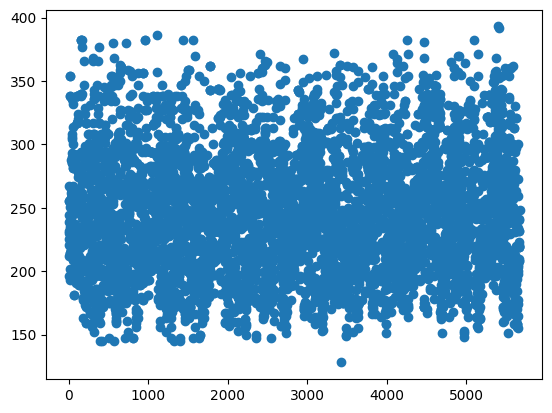

In [ ]:
plt.scatter(Y.index, Y)
plt.show()

In [ ]:
rating_pctile = np.percentile( Y, [20,40,60,80])
Y_list = []
range_1 = 0
range_2 = 0
range_3 = 0
range_4 = 0
range_5 = 0
for i in Y:
    if (i < rating_pctile[0]): 
        CO2_grade = 1
        Y_list.append(CO2_grade)
        range_1=range_1+1
    elif (rating_pctile[0] <= i < rating_pctile[1]): 
        CO2_grade = 2
        Y_list.append(CO2_grade)
        range_2=range_2+1 
    elif (rating_pctile[1] <= i < rating_pctile[2]): 
        CO2_grade = 3
        Y_list.append(CO2_grade)
        range_3=range_3+1 
    elif (rating_pctile[2] <= i < rating_pctile[3]): 
        CO2_grade = 4
        Y_list.append(CO2_grade)
        range_4=range_4+1 
    else:
        CO2_grade = 5
        Y_list.append(CO2_grade)
        range_5=range_5+1

figdata = pd.DataFrame([[1,range_1],[2,range_2],[3,range_3],[4,range_4],[5,range_5]],columns = ["CO2_LEVEL","NSamples"])

In [ ]:
fig = px.bar( figdata, x = 'CO2_LEVEL', y = 'NSamples', color='NSamples')
fig.show()

In [ ]:
Y_0 = pd.DataFrame()
Y_0['CO2_LEVEL'] = Y_list
Y = Y_0['CO2_LEVEL']

In [ ]:
Y

0       1
1       2
2       4
3       3
4       3
       ..
5668    2
5669    3
5670    3
5671    3
5672    3
Name: CO2_LEVEL, Length: 5673, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
ASM_function = ['entropy', 'gini']
nEstimator = 50
nJob = 2
rState = 10

In [ ]:
RandomF = RandomForestClassifier(criterion=ASM_function[1],n_estimators=nEstimator, n_jobs=nJob, random_state=rState)
RandomF.fit(X_train,Y_train)
y_pred= RandomF.predict(X_test)
RFScore = accuracy_score(Y_test, y_pred)
print(RFScore)
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report: ')
print(classification_report(Y_test, y_pred))

0.9441833137485312
Confusion Matrix: 
[[331   8   0   0   0]
 [ 16 322  10   0   1]
 [  0  21 335  20   0]
 [  0   0   6 300  10]
 [  0   0   0   3 319]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.95      0.98      0.97       339
           2       0.92      0.92      0.92       349
           3       0.95      0.89      0.92       376
           4       0.93      0.95      0.94       316
           5       0.97      0.99      0.98       322

    accuracy                           0.94      1702
   macro avg       0.94      0.95      0.94      1702
weighted avg       0.94      0.94      0.94      1702



In [ ]:
# Create Model List
classification = { 'KNN': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(), 'RF': RandomForestClassifier(),'SVC' : SVC() }
ASM_function = ['entropy', 'gini']
maxD = [ 4, 5, 6, None]
maxF = ['auto', 'log2', None]
minSample = [1,2, 4]
DT_param= dict(criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample, max_features = maxF)
nEst = [10, 30, 50, 100]
RF_param = dict(n_estimators= nEst, criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample,max_features = maxF)


In [ ]:
grid_RF = GridSearchCV( estimator = classification['RF'],n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = RF_param )
grid_result_RF = grid_RF.fit(X_train,Y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
[CV 1/2; 1/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 1/2; 1/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.921 total time=   0.0s
[CV 2/2; 1/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/2; 1/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.921 total time=   0.0s
[CV 1/2; 2/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 1/2; 2/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.922 total time=   0.0s
[CV 2/2; 2/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 2/2; 2/288] END criterion=entropy, max_depth=4, max_features=auto, min_sample

In [ ]:
print('Best params: ',grid_result_RF.best_params_)
print('Best score: ', grid_result_RF.best_score_)

Best params:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Best score:  0.9506424061630405


In [ ]:
RandomF = RandomForestClassifier(criterion=grid_result_RF.best_params_['criterion'],
max_depth = grid_result_RF.best_params_['max_depth'], 
max_features = grid_result_RF.best_params_['max_features'],
min_samples_leaf = grid_result_RF.best_params_['min_samples_leaf'],
 n_estimators = grid_result_RF.best_params_['n_estimators'])
RandomF.fit(X_train,Y_train)
y_pred= RandomF.predict(df_use_predict)
print(y_pred)

[4]


In [ ]:
print(rating_pctile[0],rating_pctile[1],rating_pctile[2],rating_pctile[3])

199.0 227.0 254.19999999999982 290.0
